In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv(r"..\Datasets\monthly-milk-production-pounds-p.csv")
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [10]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

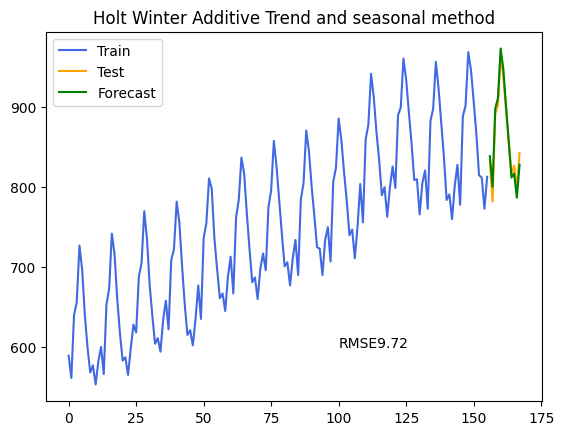

{'smoothing_level': 0.8, 'smoothing_trend': 0.02, 'smoothing_seasonal': 0.1, 'damping_trend': nan, 'initial_level': 608.4070523465033, 'initial_trend': 1.6646855249037684, 'initial_seasons': array([-20.83724119, -53.85547558,  34.95614735,  49.03596937,
       111.48308751,  85.88462373,  33.10774175, -13.08147499,
       -55.23968469, -53.03966547, -80.16636146, -43.94712038]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
9.719507270095697


In [15]:
alpha = 0.8
beta = 0.02
gamma = 0.1

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add')
fit1 = holt_add.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### Auto Tune HW Additive

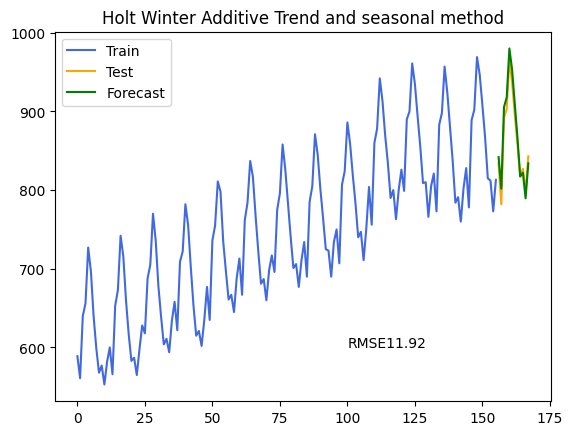

{'smoothing_level': 0.6988242817799434, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.21176775359914762, 'damping_trend': nan, 'initial_level': 607.5099254102704, 'initial_trend': 1.6171034918937004, 'initial_seasons': array([-20.26638338, -49.43610444,  34.93415372,  49.33407359,
       114.41519164,  87.93406254,  30.33699633, -17.56464405,
       -58.14667623, -55.32033443, -78.78986416, -44.012687  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
11.924815042665397


In [16]:
# alpha = 0.8
# beta = 0.02
# gamma = 0.1

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add')
# fit1 = holt_add.fit(smoothing_level = alpha, smoothing_trend = beta,
#                     smoothing_seasonal = gamma)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

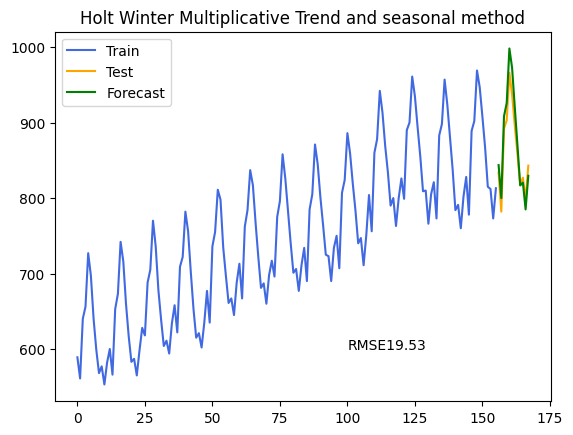

{'smoothing_level': 0.8, 'smoothing_trend': 0.02, 'smoothing_seasonal': 0.1, 'damping_trend': nan, 'initial_level': 595.7876025296972, 'initial_trend': 1.4940897430643163, 'initial_seasons': array([0.98659338, 0.93396583, 1.05726492, 1.07498136, 1.16485524,
       1.13562786, 1.067082  , 1.00390897, 0.94230707, 0.94474266,
       0.90349108, 0.95285728]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
19.534826023491107


In [18]:
alpha = 0.8
beta = 0.02
gamma = 0.1

from math import sqrt
from statsmodels.tsa.api import Holt

holt_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul')
fit1 = holt_mul.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Multiplicative Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### HW mul autotune

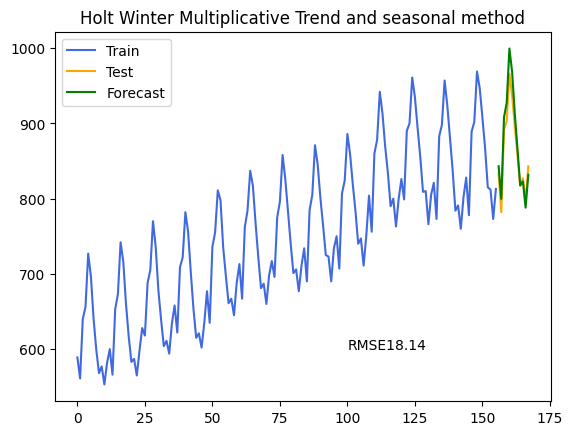

{'smoothing_level': 0.9999970105587934, 'smoothing_trend': 2.264175966101821e-10, 'smoothing_seasonal': 1.984602668648911e-06, 'damping_trend': nan, 'initial_level': 529.2157604772651, 'initial_trend': 1.4674811910101586, 'initial_seasons': array([1.10990457, 1.05067493, 1.19089617, 1.21387424, 1.30584818,
       1.26306712, 1.18808274, 1.124571  , 1.06003296, 1.06479348,
       1.01774703, 1.07236861]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
18.14369051339748


In [19]:
# alpha = 0.8
# beta = 0.02
# gamma = 0.1

from math import sqrt
from statsmodels.tsa.api import Holt

holt_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul')
# fit1 = holt_mul.fit(smoothing_level = alpha, smoothing_trend = beta,
#                     smoothing_seasonal = gamma)
fit1 = holt_mul.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Multiplicative Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### HW add damped

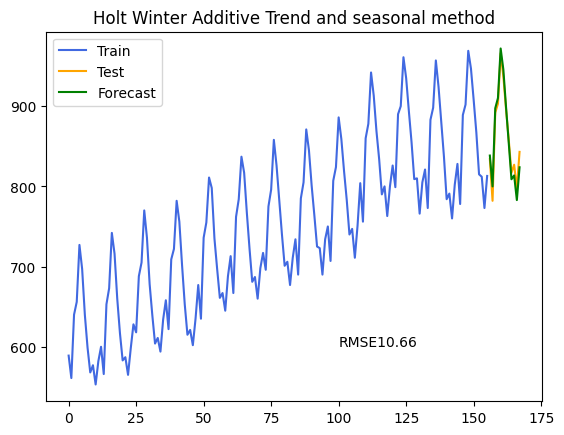

{'smoothing_level': 0.8, 'smoothing_trend': 0.02, 'smoothing_seasonal': 0.1, 'damping_trend': 0.9949999974167707, 'initial_level': 608.0485531710051, 'initial_trend': 1.9941236618604175, 'initial_seasons': array([-20.83627432, -53.86640158,  34.93233179,  49.00095811,
       111.44023127,  85.83825847,  33.06230175, -13.12197513,
       -55.2722139 , -53.06277748, -80.18320706, -43.96734009]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
10.662260568785955


In [20]:
alpha = 0.8
beta = 0.02
gamma = 0.1

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add', 
                                damped_trend=True)
fit1 = holt_add.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

### HW mul damped

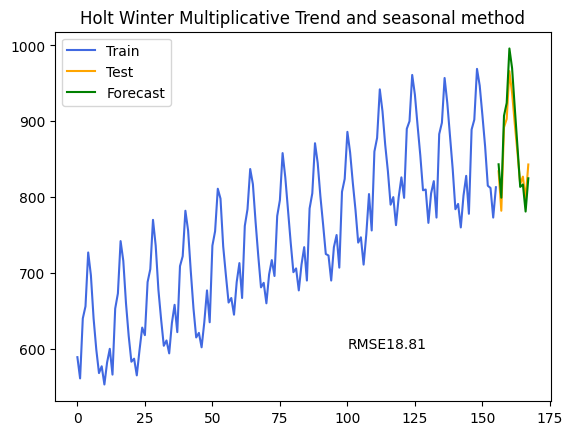

{'smoothing_level': 0.8, 'smoothing_trend': 0.02, 'smoothing_seasonal': 0.1, 'damping_trend': 0.9940200122291014, 'initial_level': 600.758884747832, 'initial_trend': 1.9190562751147915, 'initial_seasons': array([0.97770215, 0.92554245, 1.04779928, 1.06541248, 1.15455367,
       1.12557948, 1.05761493, 0.99497543, 0.93388609, 0.9362763 ,
       0.89534535, 0.94425678]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
18.810809298174835


In [21]:
alpha = 0.8
beta = 0.02
gamma = 0.1

from math import sqrt
from statsmodels.tsa.api import Holt

holt_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                damped_trend=True)
fit1 = holt_mul.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, 'RMSE'+str(error))
plt.title('Holt Winter Multiplicative Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)